In [108]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

In [109]:
#Lets take a look at our directory
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2


In [110]:

DATADIR="/home/pranay/binary_images"
CATEGORIES=['cancerous','non_cancerous']




In [111]:
training_data = []
IMG_SIZE = 150
def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  # create path to dogs and 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))



100%|██████████| 242/242 [00:00<00:00, 2206.12it/s]

917


In [112]:
import random
random.shuffle(training_data)

#reshuffling the data to reshuffle and make the data even thrroughout

In [113]:
#making the data in terms of arrays

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

#feeding images and preparing data
img_shape = (100, 100,3)

In [114]:

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just haveda

In [115]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (917, 150, 150, 3)
Shape of labels is: (917,)


In [116]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

In [117]:
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32  

In [118]:

from keras import layers
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard


In [119]:
# # Initialising the CNN without regularizers
# classifier = Sequential()

# classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (150,150,3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))

# # Adding a second convolutional layer
# classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))

# # Step 3 - Flattening
# classifier.add(Flatten())

# # Step 4 - Full connection
# classifier.add(Dense(units = 64, activation = 'relu'))
# classifier.add(Dense(units = 2, activation = 'softmax'))

In [120]:
# Initialising the CNN with regularizers
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (150,150,3), activation = 'relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
classifier.add(Dense(units = 2, activation = 'softmax'))

In [121]:
from tensorflow.keras import optimizers

classifier.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-6), metrics=['acc'])



In [122]:

#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale



In [123]:

#Create the image generators
train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)



In [124]:
#The training part
#We train for 64 epochs with about 100 steps per epoch

history = classifier.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=25,
                              validation_data=val_generator,
                              validation_steps=nval //batch_size)




Epoch 1/25
22/22 [==============================] - 7s 298ms/step - loss: 2.3972 - acc: 0.6434 - val_loss: 2.3226 - val_acc: 0.7625
Epoch 2/25
22/22 [==============================] - 5s 237ms/step - loss: 2.3410 - acc: 0.7190 - val_loss: 2.2941 - val_acc: 0.7625
Epoch 3/25
22/22 [==============================] - 5s 236ms/step - loss: 2.3154 - acc: 0.7332 - val_loss: 2.2768 - val_acc: 0.7625
Epoch 4/25
22/22 [==============================] - 5s 241ms/step - loss: 2.3115 - acc: 0.7175 - val_loss: 2.2624 - val_acc: 0.7625
Epoch 5/25
22/22 [==============================] - 5s 241ms/step - loss: 2.2839 - acc: 0.7332 - val_loss: 2.2466 - val_acc: 0.7625
Epoch 6/25
22/22 [==============================] - 5s 239ms/step - loss: 2.2752 - acc: 0.7190 - val_loss: 2.2299 - val_acc: 0.7625
Epoch 7/25
22/22 [==============================] - 5s 237ms/step - loss: 2.2477 - acc: 0.7358 - val_loss: 2.2116 - val_acc: 0.7625
Epoch 8/25
22/22 [==============================] - 5s 240ms/step - loss: 2.

In [125]:
# #lets plot the train and val curve
# import matplotlib.pyplot as plt

# #get the details form the history object
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# #Train and validation accuracy
# plt.plot(epochs, acc, 'b', label='Training accurarcy')
# plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
# plt.title('Training and Validation accurarcy')
# plt.legend()

# plt.figure()
# #Train and validation loss
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and Validation loss')
# plt.legend()

# plt.show()


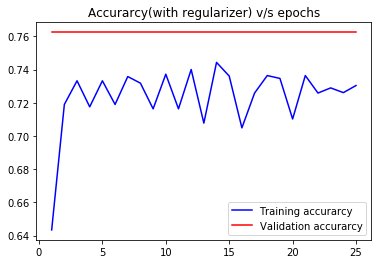

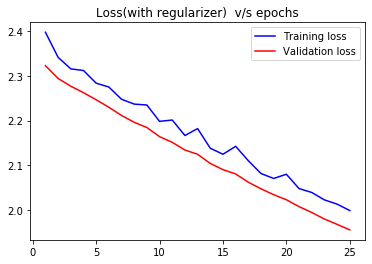

In [130]:
#with regularizer
#lets plot the train and val curve
import matplotlib.pyplot as plt

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Accurarcy(with regularizer) v/s epochs')
plt.savefig('Experiment2-accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss(with regularizer)  v/s epochs')
plt.legend()

plt.savefig('Experiment2-loss')  




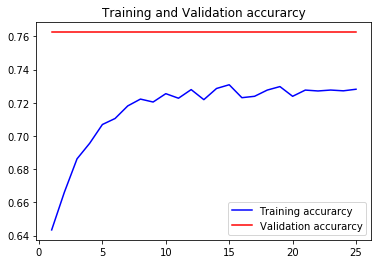

In [127]:
def smooth_plot(points, factor=0.7):
    smooth_pts = []
    for point in points:
        if smooth_pts:
            previous = smooth_pts[-1]
            smooth_pts.append(previous * factor + point * (1 - factor))
        else:
            smooth_pts.append(point)
    return smooth_pts

#Plot figure
plt.plot(epochs, smooth_plot(acc), 'b', label='Training accurarcy')
plt.plot(epochs, smooth_plot(val_acc), 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()
